# Условие задачи
Найти решение краевой задачи для одномерного стационарного уравнения теплопроводности
$$\frac{d}{dx}\left[k(x)\frac{du}{dx}\right] - q(x)u = -f(x)$$
в одиннадцати равноудаленных точках отрезка $[0,1]$ с относительной точностью $0,0001$.

Краевые условия задачи $u(0) = 0;~ u(1) = 1.$

Дополнительные условия в точке разрыва
$$\begin{equation*} 
    \begin{cases}
        u(x_0 - 0) = u(x_0 + 0), \\
        k(x_0 - 0)u'_x(x_0 - 0) = k(x_0 + 0)u'_x(x_0 + 0). \\
    \end{cases}
\end{equation*}$$
$$x < x_0 = 0,525;~ k(x) = e^{-x^2};~ q(x) = x^2;~ f(x) = \sin(x)$$
$$x > x_0 = 0,525;~ k(x) = x;~ q(x) = x^2;~ f(x) = \sin(x)$$

Модельная задача 
$$x_0 = 0,525;~ k(x) = k(x_0);~ q(x) = q(x_0);~ f(x) = f(x_0)$$

In [59]:
import numpy as np
from matplotlib import pyplot as plt

# Task conditions
x0 = 0.525

def k(x):
    return (np.exp(-(x ** 2.0))) if x < x0 else x

def q(x):
    return x ** 2.0

def f(x):
    return np.sin(x)

# Реализация Метода Прогонки

Подробное описание метода прогонки находиться в книге Демченко В.В. *"Вычислительный Практикум По Прикладной Математике", Лабораторная работа №4 - Вариант 3*

In [60]:
def TridiagonalMatrixAlgorithm(u_l, u_r, h):
    L = int(1 / h) + 1

    a = np.zeros(L + 1)
    b = np.zeros(L + 1)
    c = np.zeros(L + 1)
    d = np.zeros(L + 1)
    alpha = np.zeros(L + 1)
    beta  = np.zeros(L + 1)

    l_alpha = int(np.floor(x0 / h))
    l_beta = l_alpha + 1

    x = np.linspace(0, 1, L + 1)

    u = np.zeros(L + 1)
    u[0] = u_l
    u[L] = u_r

    for l in range(1, l_alpha):
        a[l] = k((l + 0.5) * h)
        b[l] = -(k((l + 0.5) * h) + k((l - 0.5) * h) + q(l * h) * h * h)
        c[l] = k((l - 0.5) * h)
        d[l] = -f(l * h) * h * h

    for l in range(l_beta + 1, L):
        a[l] = k((l + 0.5) * h)
        b[l] = -(k((l + 0.5) * h) + k((l - 0.5) * h) + q(l * h) * h * h)
        c[l] = k((l - 0.5) * h)
        d[l] = -f(l * h) * h * h

    alpha[1] = -a[1] / b[1]
    beta[1]  = (d[1] - c[1] * u_l) / b[1]

    alpha[L - 1] = -c[L - 1] / b[L - 1]
    beta[L - 1]  = (d[L - 1] - c[L - 1] * u_r) / b[L - 1]

    for l in range(2, l_alpha):
        alpha[l] = -a[l] / (b[l] + c[l] * alpha[l - 1])
        beta[l]  = (d[l] - c[l] * beta[l - 1]) / (b[l] + c[l] * alpha[l - 1])

    for l in range(L - 2, l_beta, -1):
        alpha[l] = -c[l] / (b[l] + a[l] * alpha[l + 1])
        beta[l]  = (d[l] - a[l] * beta[l + 1]) / (b[l] + a[l] * alpha[l + 1])

    u[l_alpha] = (k(l_alpha * h) * beta[l_alpha - 1] + k(l_beta * h) * beta[l_beta + 1]) / (k(l_alpha * h) * (1 - alpha[l_alpha - 1]) + k(l_beta * h) * (1 - alpha[l_beta + 1]))
    u[l_beta] = u[l_alpha].copy()

    u[l_alpha - 1] = alpha[l_alpha - 1] * u[l_alpha] + beta[l_alpha - 1]
    u[l_beta + 1] = alpha[l_beta + 1] * u[l_beta] + beta[l_beta + 1]

    for l in range(l_alpha - 1, 0, -1):
        u[l] = alpha[l] * u[l + 1] + beta[l]

    for l in range(l_beta + 1, L):
        u[l] = alpha[l] * u[l - 1] + beta[l]

    return x, u

# График
График получившейся функции

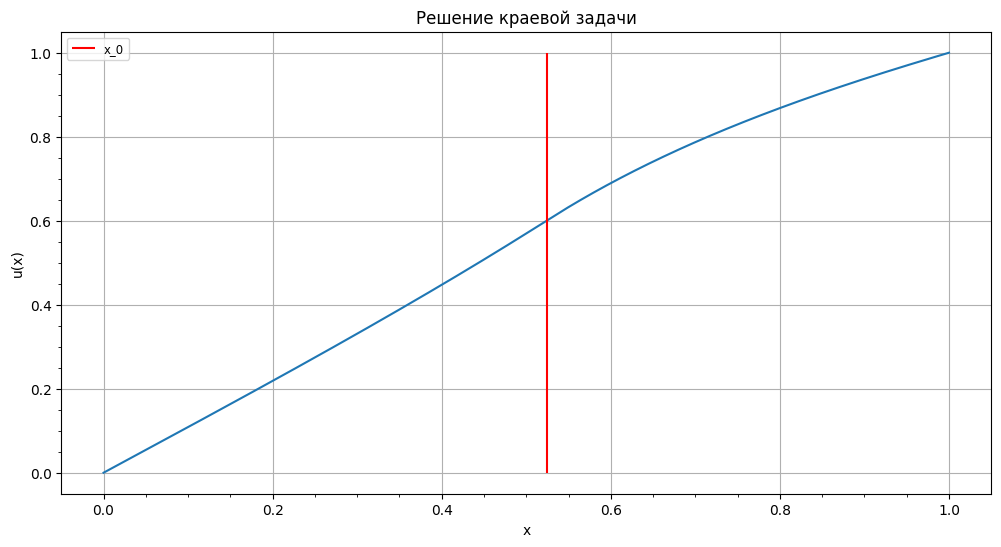

In [61]:
h = 1e-5
x, u = TridiagonalMatrixAlgorithm(0, 1, h)

plt.figure(figsize=[12, 8], dpi=100)
plt.plot(x, u)

plt.title("Решение краевой задачи")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.minorticks_on()
plt.grid()
plt.vlines(x0, min(u), max(u), colors="red", label="x_0")
plt.legend(loc = 'best', fontsize = 'small')

plt.show()